<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
data = pd.read_excel('/content/New_data_2_GANS - Copy.xlsx')

In [8]:
X = data.iloc[:, :8]  # 8 input variables
y = data.iloc[:, 8:]  # 3 output variables

In [22]:
X = data.iloc[:, :8]  # 8 input variables
y1 = data.iloc[:, 8]  # 1st output variable
y2 = data.iloc[:, 9]  # 2nd output variable
y3 = data.iloc[:, 10]  # 3rd output variable




In [23]:
gbr = GradientBoostingRegressor(random_state=42)




In [24]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

In [25]:
# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Hyperparameter tuning
grid_search1 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search1.fit(X_train, y1_train)

best_params1 = grid_search1.best_params_
print("Best parameters found for output 1:", best_params1)

# Train the GBR model with the best hyperparameters
best_gbr1 = GradientBoostingRegressor(**best_params1, random_state=42)
best_gbr1.fit(X_train, y1_train)

# Evaluate the model
y1_pred = best_gbr1.predict(X_test)
mse1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error for output 1:", mse1)

Best parameters found for output 1: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error for output 1: 6.1810061690394935


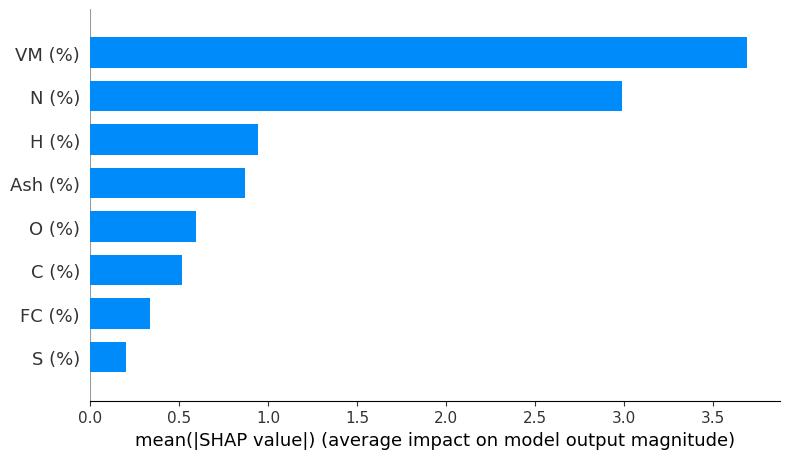

In [26]:
shap.initjs()
explainer1 = shap.TreeExplainer(best_gbr1)
shap_values1 = explainer1.shap_values(X_test)

shap.summary_plot(shap_values1, X_test, plot_type='bar')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


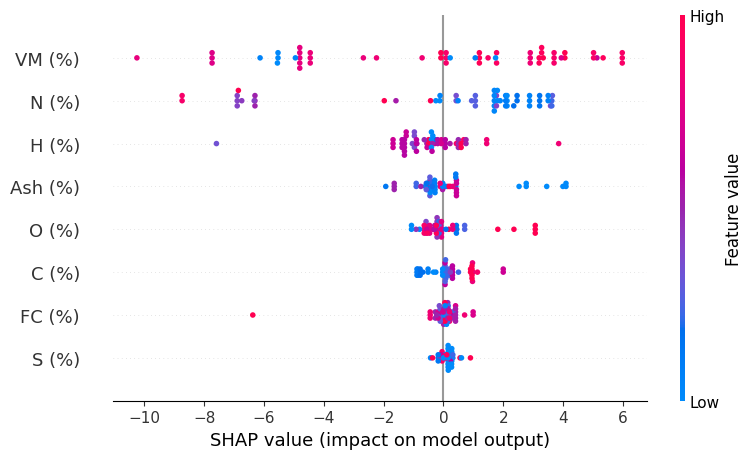

In [29]:
shap.initjs()
explainer1 = shap.TreeExplainer(best_gbr1)
shap_values1 = explainer1.shap_values(X_test)

shap.summary_plot(shap_values1, X_test)


Best parameters found for output 2: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Mean Squared Error for output 2: 7.692389422334999


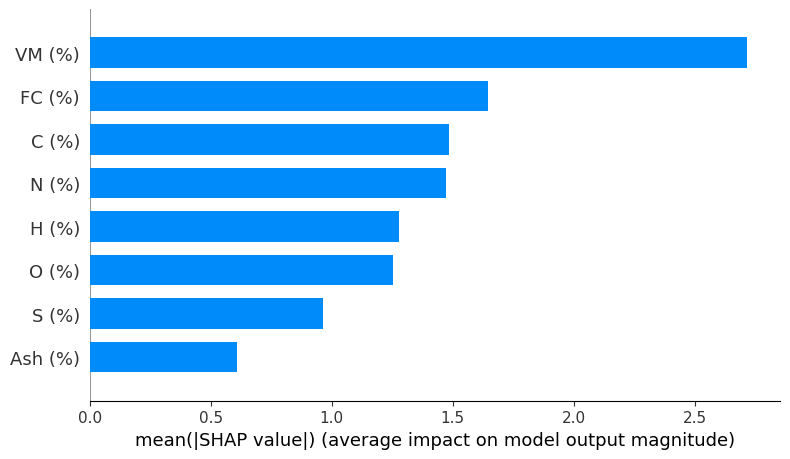

In [30]:
# Split the data
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Hyperparameter tuning
grid_search2 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search2.fit(X_train, y2_train)

best_params2 = grid_search2.best_params_
print("Best parameters found for output 2:", best_params2)

# Train the GBR model with the best hyperparameters
best_gbr2 = GradientBoostingRegressor(**best_params2, random_state=42)
best_gbr2.fit(X_train, y2_train)

# Evaluate the model
y2_pred = best_gbr2.predict(X_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error for output 2:", mse2)

# SHAP feature importance
shap.initjs()
explainer2 = shap.TreeExplainer(best_gbr2)
shap_values2 = explainer2.shap_values(X_test)

shap.summary_plot(shap_values2, X_test, plot_type='bar')




No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


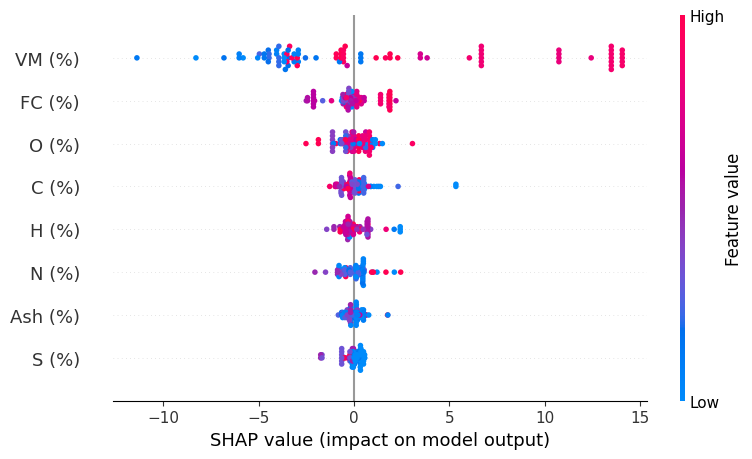

In [ ]:
shap.initjs()
explainer2 = shap.TreeExplainer(best_gbr2)
shap_values2 = explainer2.shap_values(X_test)

shap.summary_plot(shap_values2, X_test)


Best parameters found for output 3: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error for output 3: 6.637515849983859


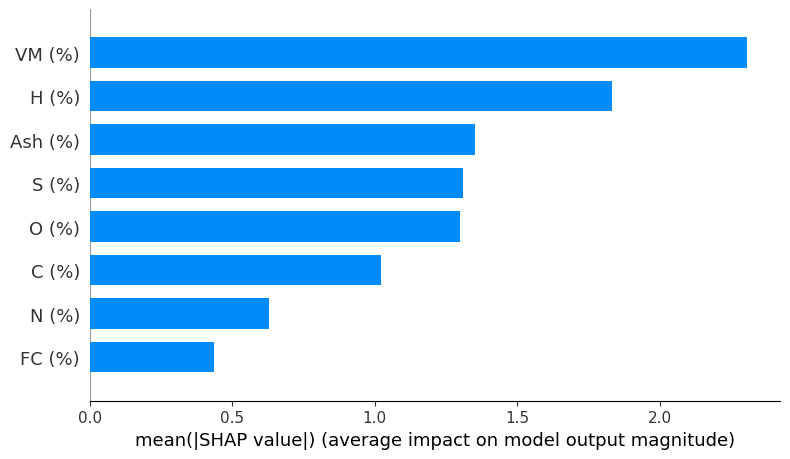

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


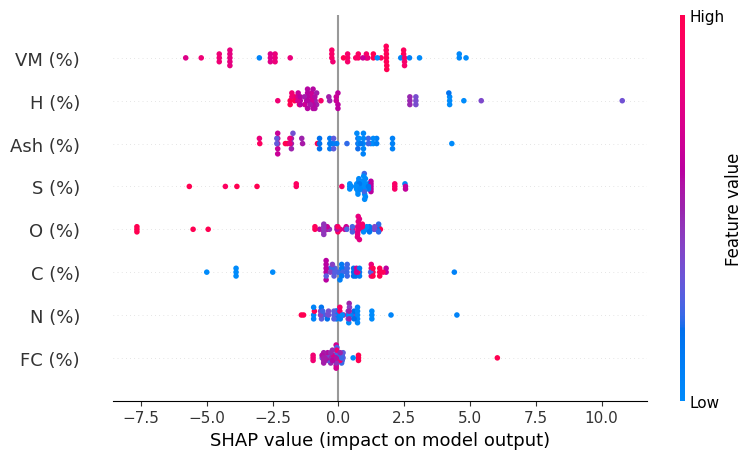

In [31]:
# Split the data
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

# Hyperparameter tuning
grid_search3 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search3.fit(X_train, y3_train)

best_params3 = grid_search3.best_params_
print("Best parameters found for output 3:", best_params3)

# Train the GBR model with the best hyperparameters
best_gbr3 = GradientBoostingRegressor(**best_params3, random_state=42)
best_gbr3.fit(X_train, y3_train)

# Evaluate the model
y3_pred = best_gbr3.predict(X_test)
mse3 = mean_squared_error(y3_test, y3_pred)
print("Mean Squared Error for output 3:", mse3)

# SHAP feature importance
shap.initjs()
explainer3 = shap.TreeExplainer(best_gbr3)
shap_values3 = explainer3.shap_values(X_test)

shap.summary_plot(shap_values3, X_test, plot_type='bar')

shap.initjs()
explainer3 = shap.TreeExplainer(best_gbr3)
shap_values3 = explainer3.shap_values(X_test)

shap.summary_plot(shap_values3, X_test)


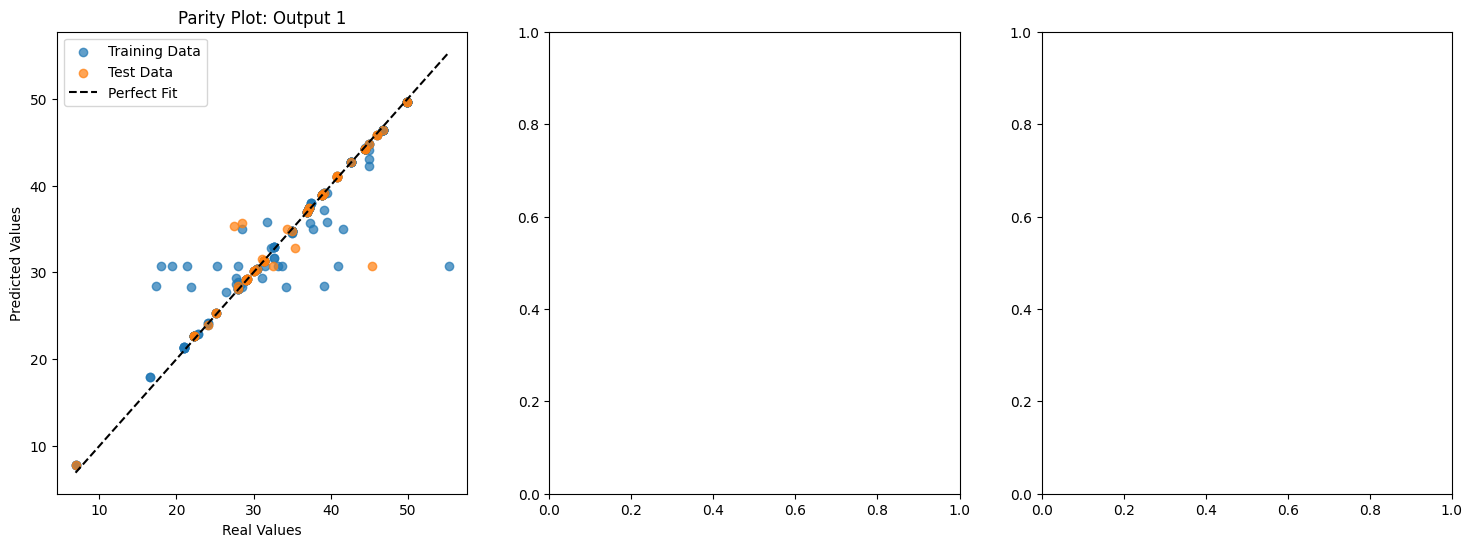

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Output 1
y1_train_pred = best_gbr1.predict(X_train)
y1_test_pred = best_gbr1.predict(X_test)

axs[0].scatter(y1_train, y1_train_pred, label='Training Data', alpha=0.7)
axs[0].scatter(y1_test, y1_test_pred, label='Test Data', alpha=0.7)

min_val1 = min(np.min(y1_train), np.min(y1_train_pred))
max_val1 = max(np.max(y1_train), np.max(y1_train_pred))
axs[0].plot([min_val1, max_val1], [min_val1, max_val1], 'k--', label='Perfect Fit')

axs[0].set_xlabel('Real Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Parity Plot: Output 1')
axs[0].legend()

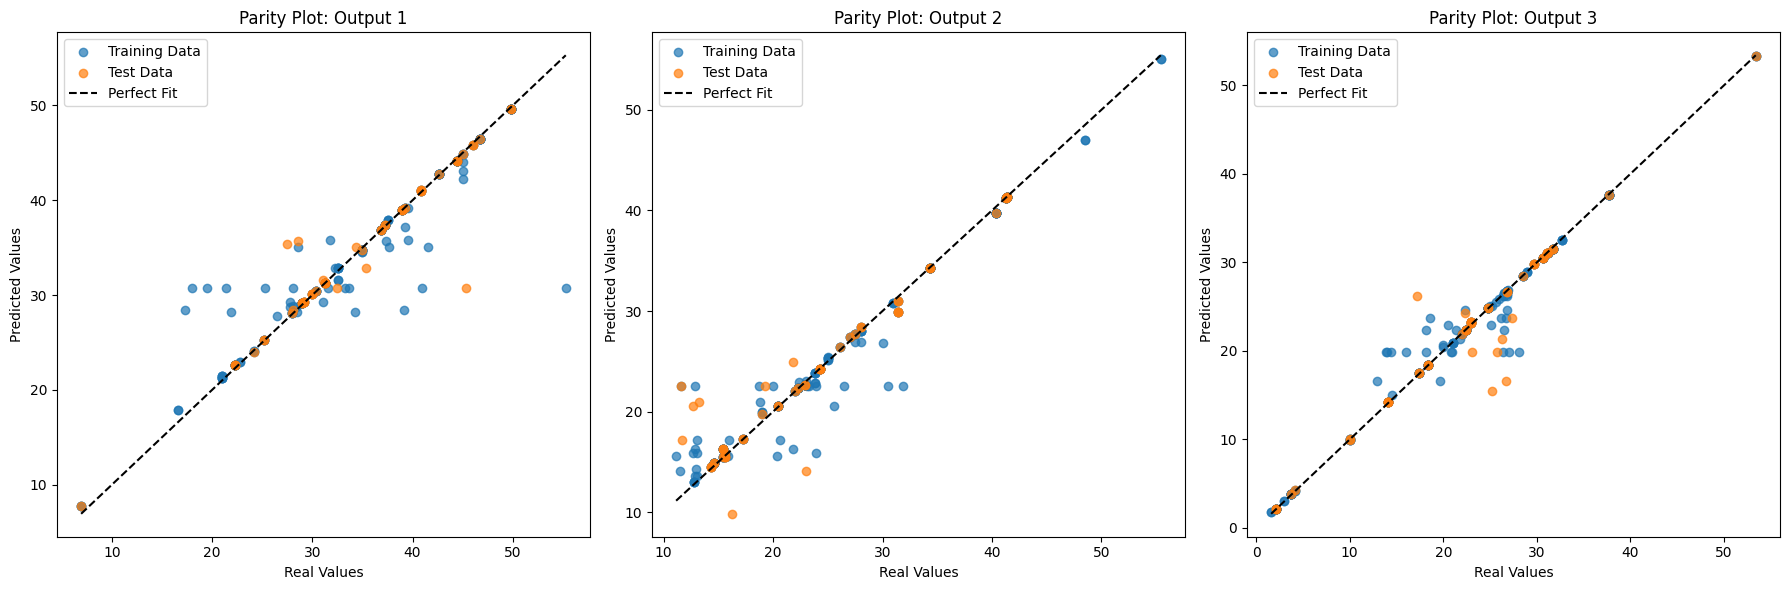

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Output 1
y1_train_pred = best_gbr1.predict(X_train)
y1_test_pred = best_gbr1.predict(X_test)

axs[0].scatter(y1_train, y1_train_pred, label='Training Data', alpha=0.7)
axs[0].scatter(y1_test, y1_test_pred, label='Test Data', alpha=0.7)

min_val1 = min(np.min(y1_train), np.min(y1_train_pred))
max_val1 = max(np.max(y1_train), np.max(y1_train_pred))
axs[0].plot([min_val1, max_val1], [min_val1, max_val1], 'k--', label='Perfect Fit')

axs[0].set_xlabel('Real Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Parity Plot: Output 1')
axs[0].legend()

# Output 2
y2_train_pred = best_gbr2.predict(X_train)
y2_test_pred = best_gbr2.predict(X_test)

axs[1].scatter(y2_train, y2_train_pred, label='Training Data', alpha=0.7)
axs[1].scatter(y2_test, y2_test_pred, label='Test Data', alpha=0.7)

min_val2 = min(np.min(y2_train), np.min(y2_train_pred))
max_val2 = max(np.max(y2_train), np.max(y2_train_pred))
axs[1].plot([min_val2, max_val2], [min_val2, max_val2], 'k--', label='Perfect Fit')

axs[1].set_xlabel('Real Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Parity Plot: Output 2')
axs[1].legend()

# Output 3
y3_train_pred = best_gbr3.predict(X_train)
y3_test_pred = best_gbr3.predict(X_test)

axs[2].scatter(y3_train, y3_train_pred, label='Training Data', alpha=0.7)
axs[2].scatter(y3_test, y3_test_pred, label='Test Data', alpha=0.7)

min_val3 = min(np.min(y3_train), np.min(y3_train_pred))
max_val3 = max(np.max(y3_train), np.max(y3_train_pred))
axs[2].plot([min_val3, max_val3], [min_val3, max_val3], 'k--', label='Perfect Fit')

axs[2].set_xlabel('Real Values')
axs[2].set_ylabel('Predicted Values')
axs[2].set_title('Parity Plot: Output 3')
axs[2].legend()

plt.tight_layout()
plt.show()


In [34]:
# More extensive hyperparameter search
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

In [35]:
# Hyperparameter tuning
grid_search1 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search1.fit(X_train, y1_train)

best_params1 = grid_search1.best_params_
print("Best parameters found for output 1:", best_params1)

# Train the GBR model with the best hyperparameters
best_gbr1 = GradientBoostingRegressor(**best_params1, random_state=42)
best_gbr1.fit(X_train, y1_train)

# Evaluate the model
y1_pred = best_gbr1.predict(X_test)
mse1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error for output 1:", mse1)

Best parameters found for output 1: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error for output 1: 6.1810061690394935


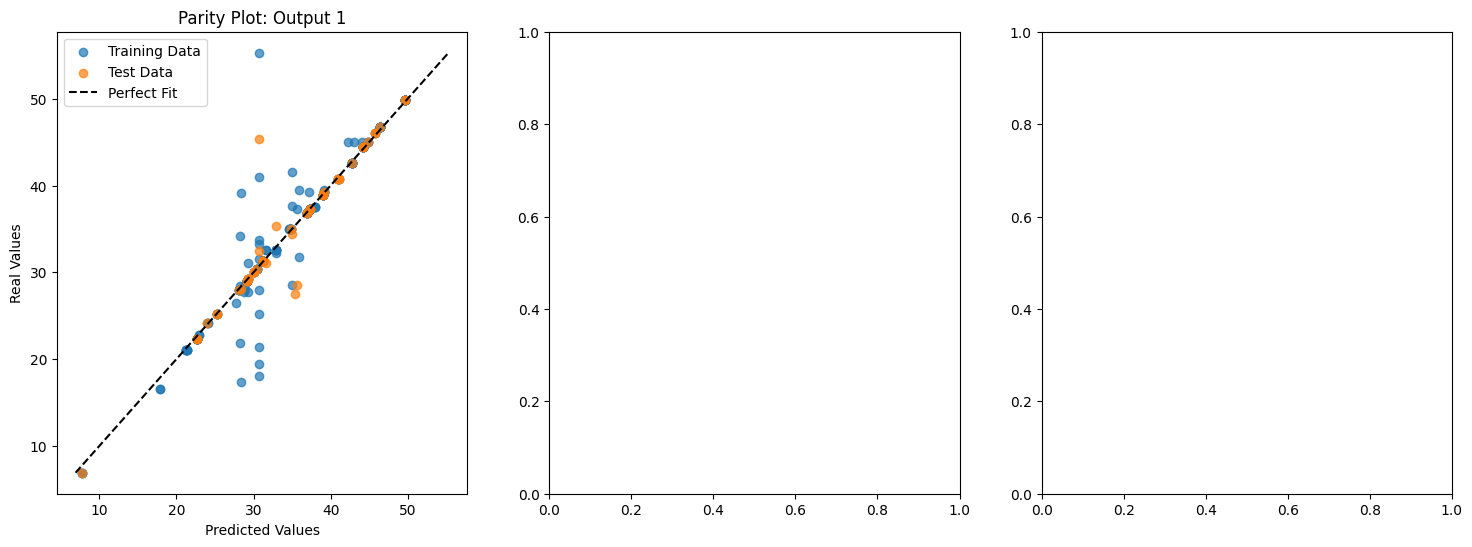

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Output 1
axs[0].scatter(y1_train_pred, y1_train, label='Training Data', alpha=0.7)
axs[0].scatter(y1_test_pred, y1_test, label='Test Data', alpha=0.7)

min_val1 = min(np.min(y1_train), np.min(y1_train_pred))
max_val1 = max(np.max(y1_train), np.max(y1_train_pred))
axs[0].plot([min_val1, max_val1], [min_val1, max_val1], 'k--', label='Perfect Fit')

axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Real Values')
axs[0].set_title('Parity Plot: Output 1')
axs[0].legend()

Best parameters found for output 2: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Mean Squared Error for output 2: 7.692389422334999


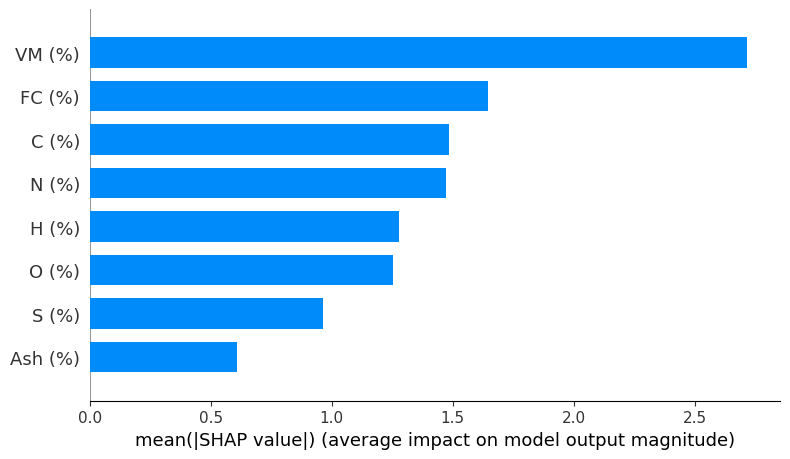

In [37]:
# Hyperparameter tuning
grid_search2 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search2.fit(X_train, y2_train)

best_params2 = grid_search2.best_params_
print("Best parameters found for output 2:", best_params2)

# Train the GBR model with the best hyperparameters
best_gbr2 = GradientBoostingRegressor(**best_params2, random_state=42)
best_gbr2.fit(X_train, y2_train)

# Evaluate the model
y2_pred = best_gbr2.predict(X_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error for output 2:", mse2)

# SHAP feature importance
shap.initjs()
explainer2 = shap.TreeExplainer(best_gbr2)
shap_values2 = explainer2.shap_values(X_test)

shap.summary_plot(shap_values2, X_test, plot_type='bar')




Best parameters found for output 3: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error for output 3: 6.637515849983859


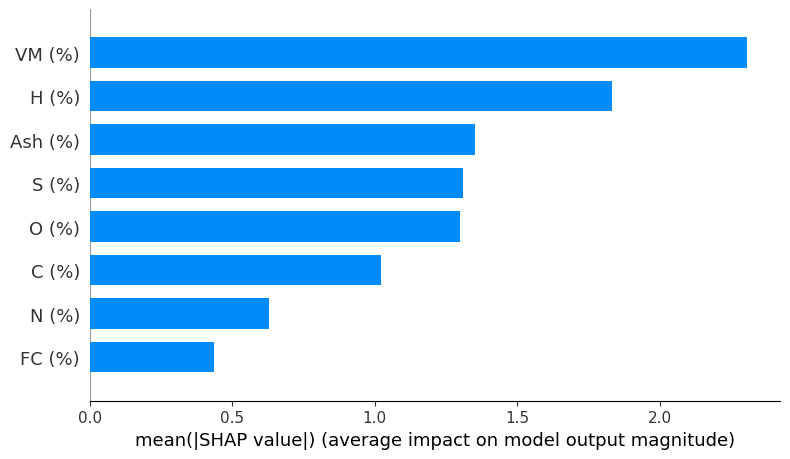

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


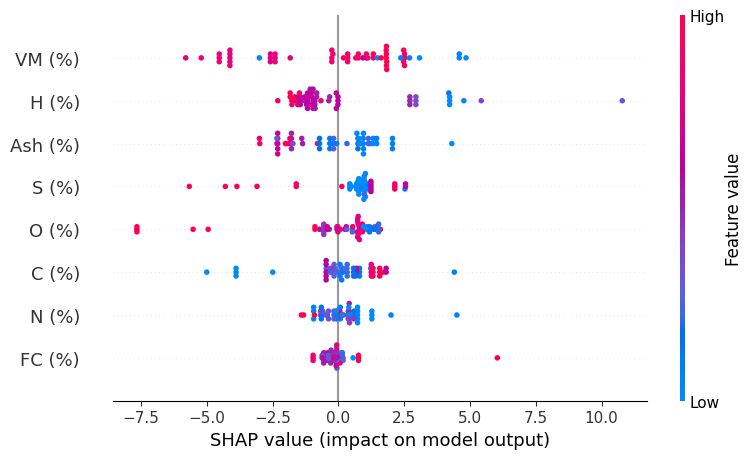

In [38]:
# Hyperparameter tuning
grid_search3 = GridSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
grid_search3.fit(X_train, y3_train)

best_params3 = grid_search3.best_params_
print("Best parameters found for output 3:", best_params3)

# Train the GBR model with the best hyperparameters
best_gbr3 = GradientBoostingRegressor(**best_params3, random_state=42)
best_gbr3.fit(X_train, y3_train)

# Evaluate the model
y3_pred = best_gbr3.predict(X_test)
mse3 = mean_squared_error(y3_test, y3_pred)
print("Mean Squared Error for output 3:", mse3)

# SHAP feature importance
shap.initjs()
explainer3 = shap.TreeExplainer(best_gbr3)
shap_values3 = explainer3.shap_values(X_test)

shap.summary_plot(shap_values3, X_test, plot_type='bar')

shap.initjs()
explainer3 = shap.TreeExplainer(best_gbr3)
shap_values3 = explainer3.shap_values(X_test)

shap.summary_plot(shap_values3, X_test)


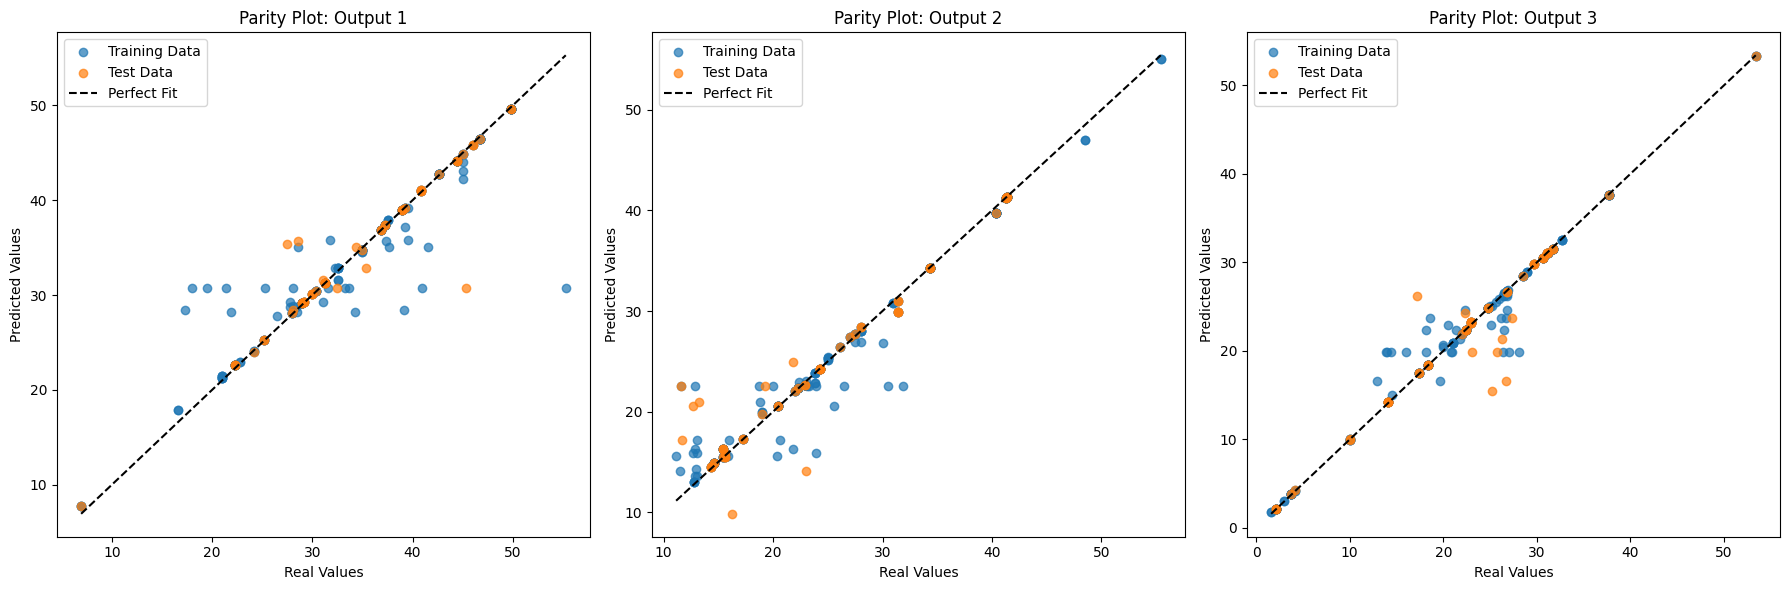

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Output 1
y1_train_pred = best_gbr1.predict(X_train)
y1_test_pred = best_gbr1.predict(X_test)

axs[0].scatter(y1_train, y1_train_pred, label='Training Data', alpha=0.7)
axs[0].scatter(y1_test, y1_test_pred, label='Test Data', alpha=0.7)

min_val1 = min(np.min(y1_train), np.min(y1_train_pred))
max_val1 = max(np.max(y1_train), np.max(y1_train_pred))
axs[0].plot([min_val1, max_val1], [min_val1, max_val1], 'k--', label='Perfect Fit')

axs[0].set_xlabel('Real Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Parity Plot: Output 1')
axs[0].legend()

# Output 2
y2_train_pred = best_gbr2.predict(X_train)
y2_test_pred = best_gbr2.predict(X_test)

axs[1].scatter(y2_train, y2_train_pred, label='Training Data', alpha=0.7)
axs[1].scatter(y2_test, y2_test_pred, label='Test Data', alpha=0.7)

min_val2 = min(np.min(y2_train), np.min(y2_train_pred))
max_val2 = max(np.max(y2_train), np.max(y2_train_pred))
axs[1].plot([min_val2, max_val2], [min_val2, max_val2], 'k--', label='Perfect Fit')

axs[1].set_xlabel('Real Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Parity Plot: Output 2')
axs[1].legend()

# Output 3
y3_train_pred = best_gbr3.predict(X_train)
y3_test_pred = best_gbr3.predict(X_test)

axs[2].scatter(y3_train, y3_train_pred, label='Training Data', alpha=0.7)
axs[2].scatter(y3_test, y3_test_pred, label='Test Data', alpha=0.7)

min_val3 = min(np.min(y3_train), np.min(y3_train_pred))
max_val3 = max(np.max(y3_train), np.max(y3_train_pred))
axs[2].plot([min_val3, max_val3], [min_val3, max_val3], 'k--', label='Perfect Fit')

axs[2].set_xlabel('Real Values')
axs[2].set_ylabel('Predicted Values')
axs[2].set_title('Parity Plot: Output 3')
axs[2].legend()

plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

for i, (y_train, y_train_pred, y_test, y_test_pred) in enumerate([(y1_train, y1_train_pred, y1_test, y1_test_pred),
                                                                   (y2_train, y2_train_pred, y2_test, y2_test_pred),
                                                                   (y3_train, y3_train_pred, y3_test, y3_test_pred)]):
    r2_train, mae_train, rmse_train = evaluate_model(y_train, y_train_pred)
    r2_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred)

    print(f"Output {i + 1}:")
    print(f"Training R2: {r2_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
    print(f"Test R2: {r2_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")
    print()


Output 1:
Training R2: 0.9155, MAE: 0.9105, RMSE: 2.7234
Test R2: 0.9095, MAE: 0.7811, RMSE: 2.4862

Output 2:
Training R2: 0.9680, MAE: 0.7280, RMSE: 1.7735
Test R2: 0.9069, MAE: 1.2344, RMSE: 2.7735

Output 3:
Training R2: 0.9826, MAE: 0.4780, RMSE: 1.3653
Test R2: 0.9254, MAE: 0.9778, RMSE: 2.5763



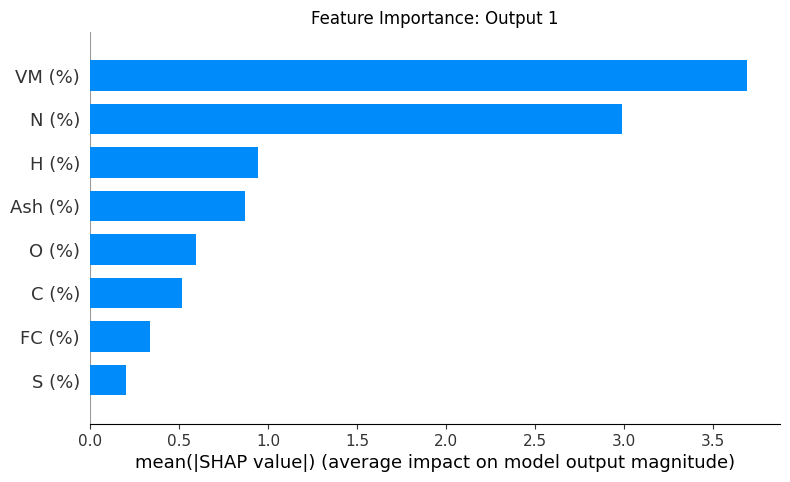

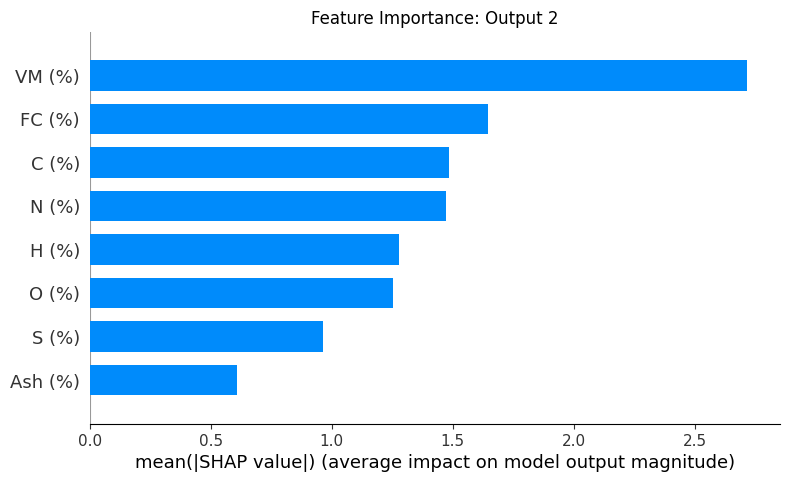

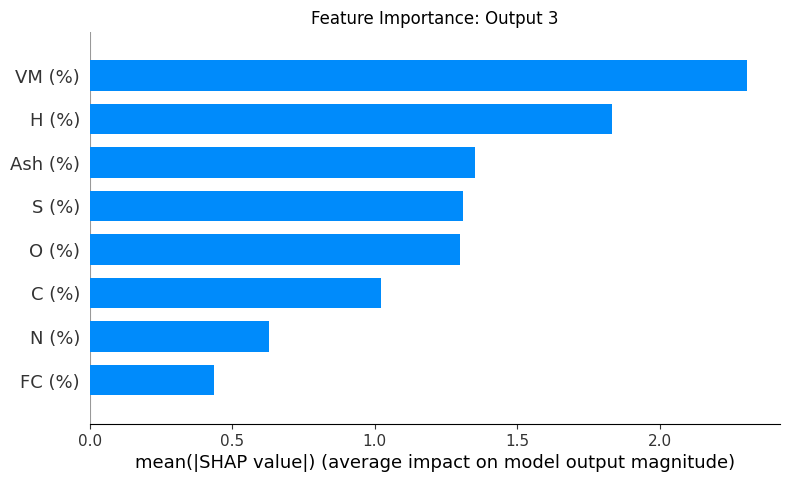

In [41]:
import shap

# 1st Output Variable
shap.initjs()
explainer1 = shap.TreeExplainer(best_gbr1)
shap_values1 = explainer1.shap_values(X_test)
shap.summary_plot(shap_values1, X_test, plot_type='bar', show=False)
plt.title("Feature Importance: Output 1")
plt.show()

# 2nd Output Variable
shap.initjs()
explainer2 = shap.TreeExplainer(best_gbr2)
shap_values2 = explainer2.shap_values(X_test)
shap.summary_plot(shap_values2, X_test, plot_type='bar', show=False)
plt.title("Feature Importance: Output 2")
plt.show()

# 3rd Output Variable
shap.initjs()
explainer3 = shap.TreeExplainer(best_gbr3)
shap_values3 = explainer3.shap_values(X_test)
shap.summary_plot(shap_values3, X_test, plot_type='bar', show=False)
plt.title("Feature Importance: Output 3")
plt.show()


ValueError: ignored

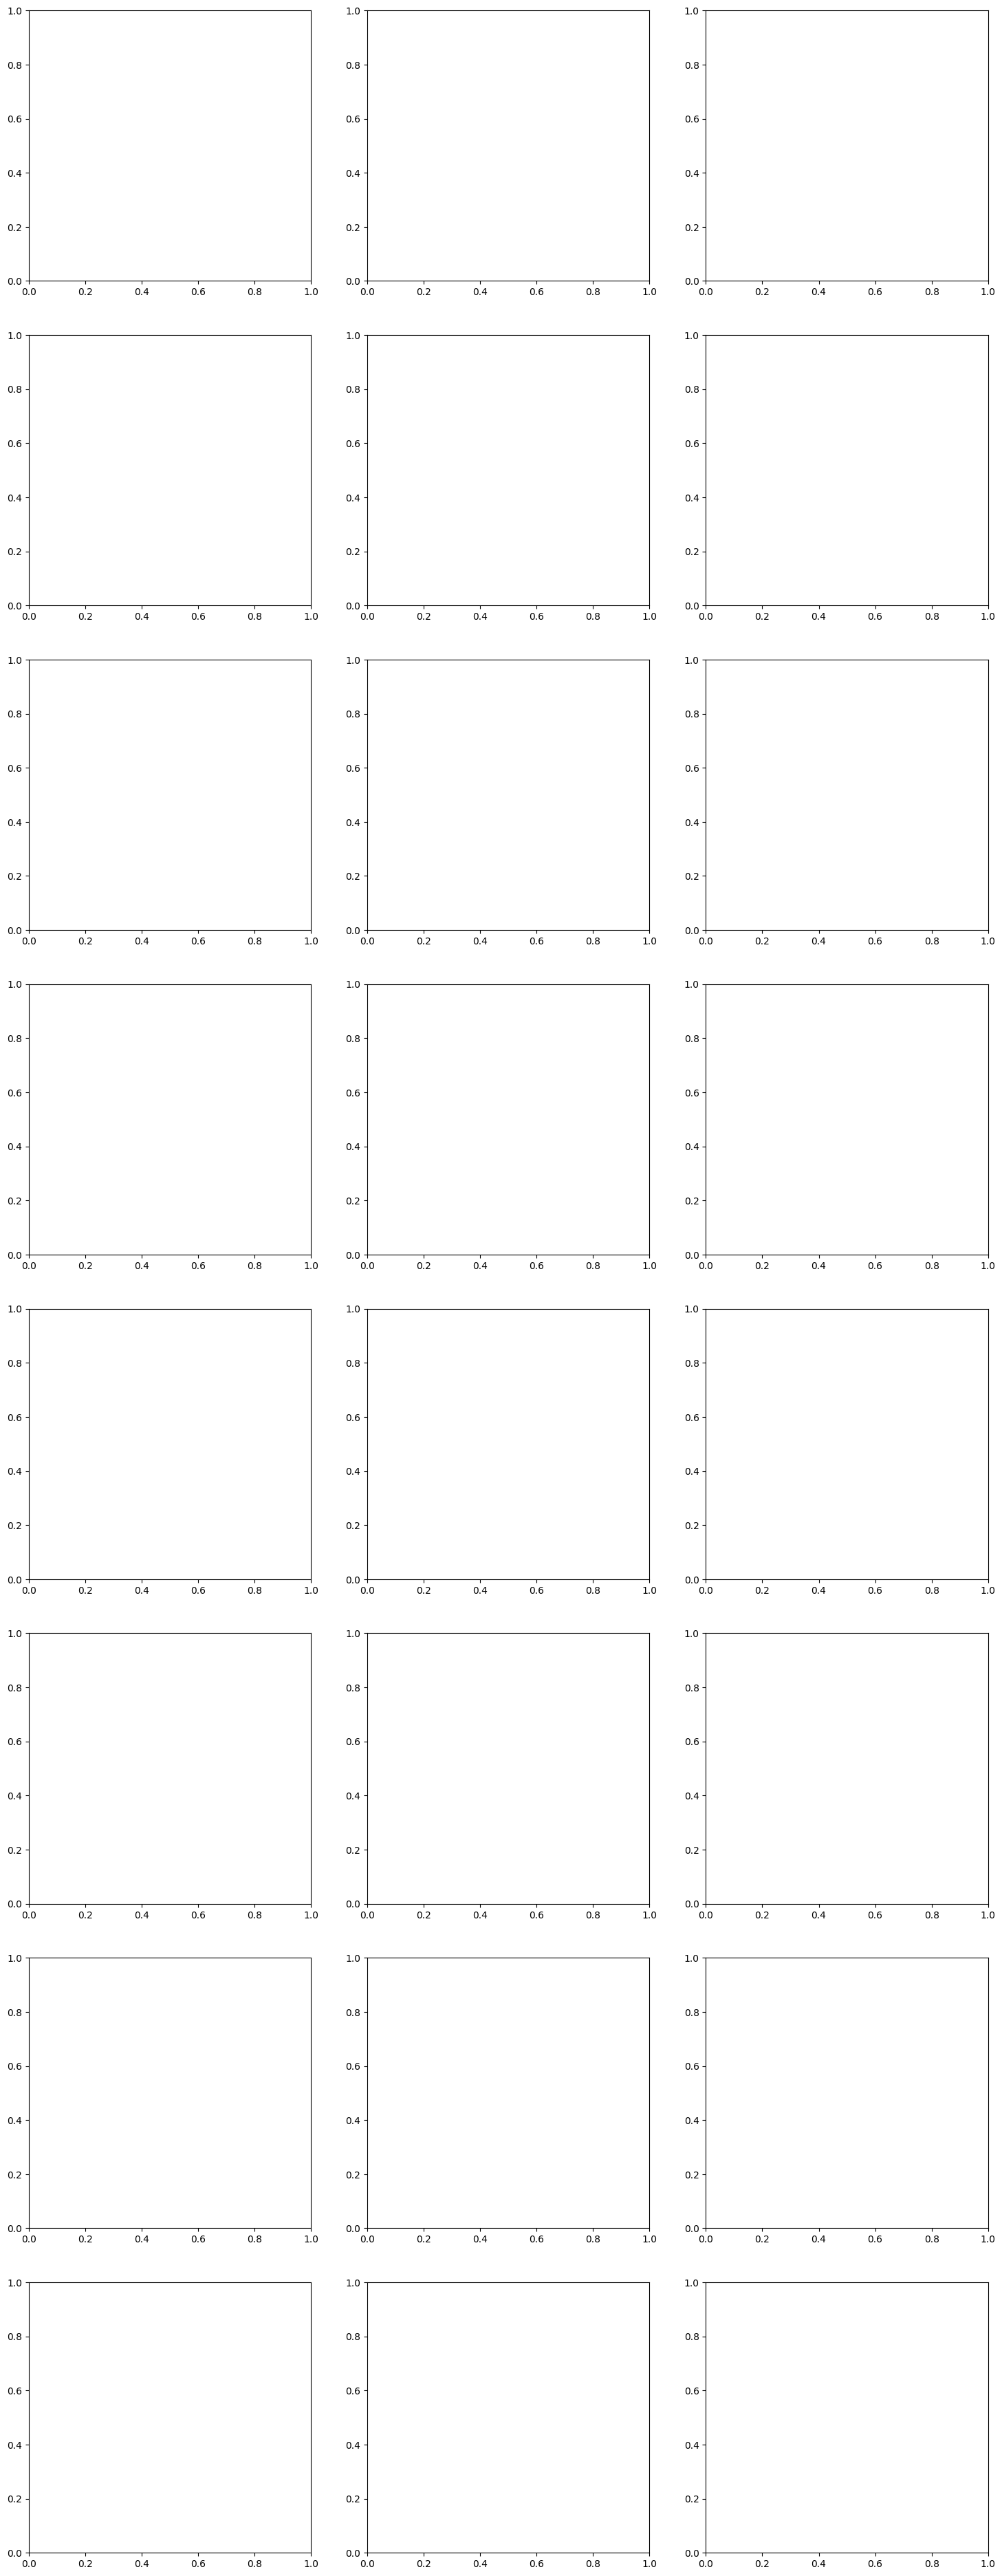

In [46]:
from sklearn.inspection import partial_dependence

fig, axs = plt.subplots(len(X.columns), 3, figsize=(18, 6 * len(X.columns)))

for input_variable_index, input_variable_name in enumerate(X.columns):
    # Output 1
    pdp1, axes1 = partial_dependence(best_gbr1, X_test, features=[input_variable_index])
    axs[input_variable_index, 0].plot(axes1[0], pdp1[0])
    axs[input_variable_index, 0].set_title(f"Partial Dependence Plot: Output 1\nInput Variable: {input_variable_name}")

    # Output 2
    pdp2, axes2 = partial_dependence(best_gbr2, X_test, features=[input_variable_index])
    axs[input_variable_index, 1].plot(axes2[0], pdp2[0])
    axs[input_variable_index, 1].set_title(f"Partial Dependence Plot: Output 2\nInput Variable: {input_variable_name}")

    # Output 3
    pdp3, axes3 = partial_dependence(best_gbr3, X_test, features=[input_variable_index])
    axs[input_variable_index, 2].plot(axes3[0], pdp3[0])
    axs[input_variable_index, 2].set_title(f"Partial Dependence Plot: Output 3\nInput Variable: {input_variable_name}")

plt.tight_layout()
plt.show()



In [47]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
print(numeric_columns)


Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)'],
      dtype='object')


ValueError: ignored

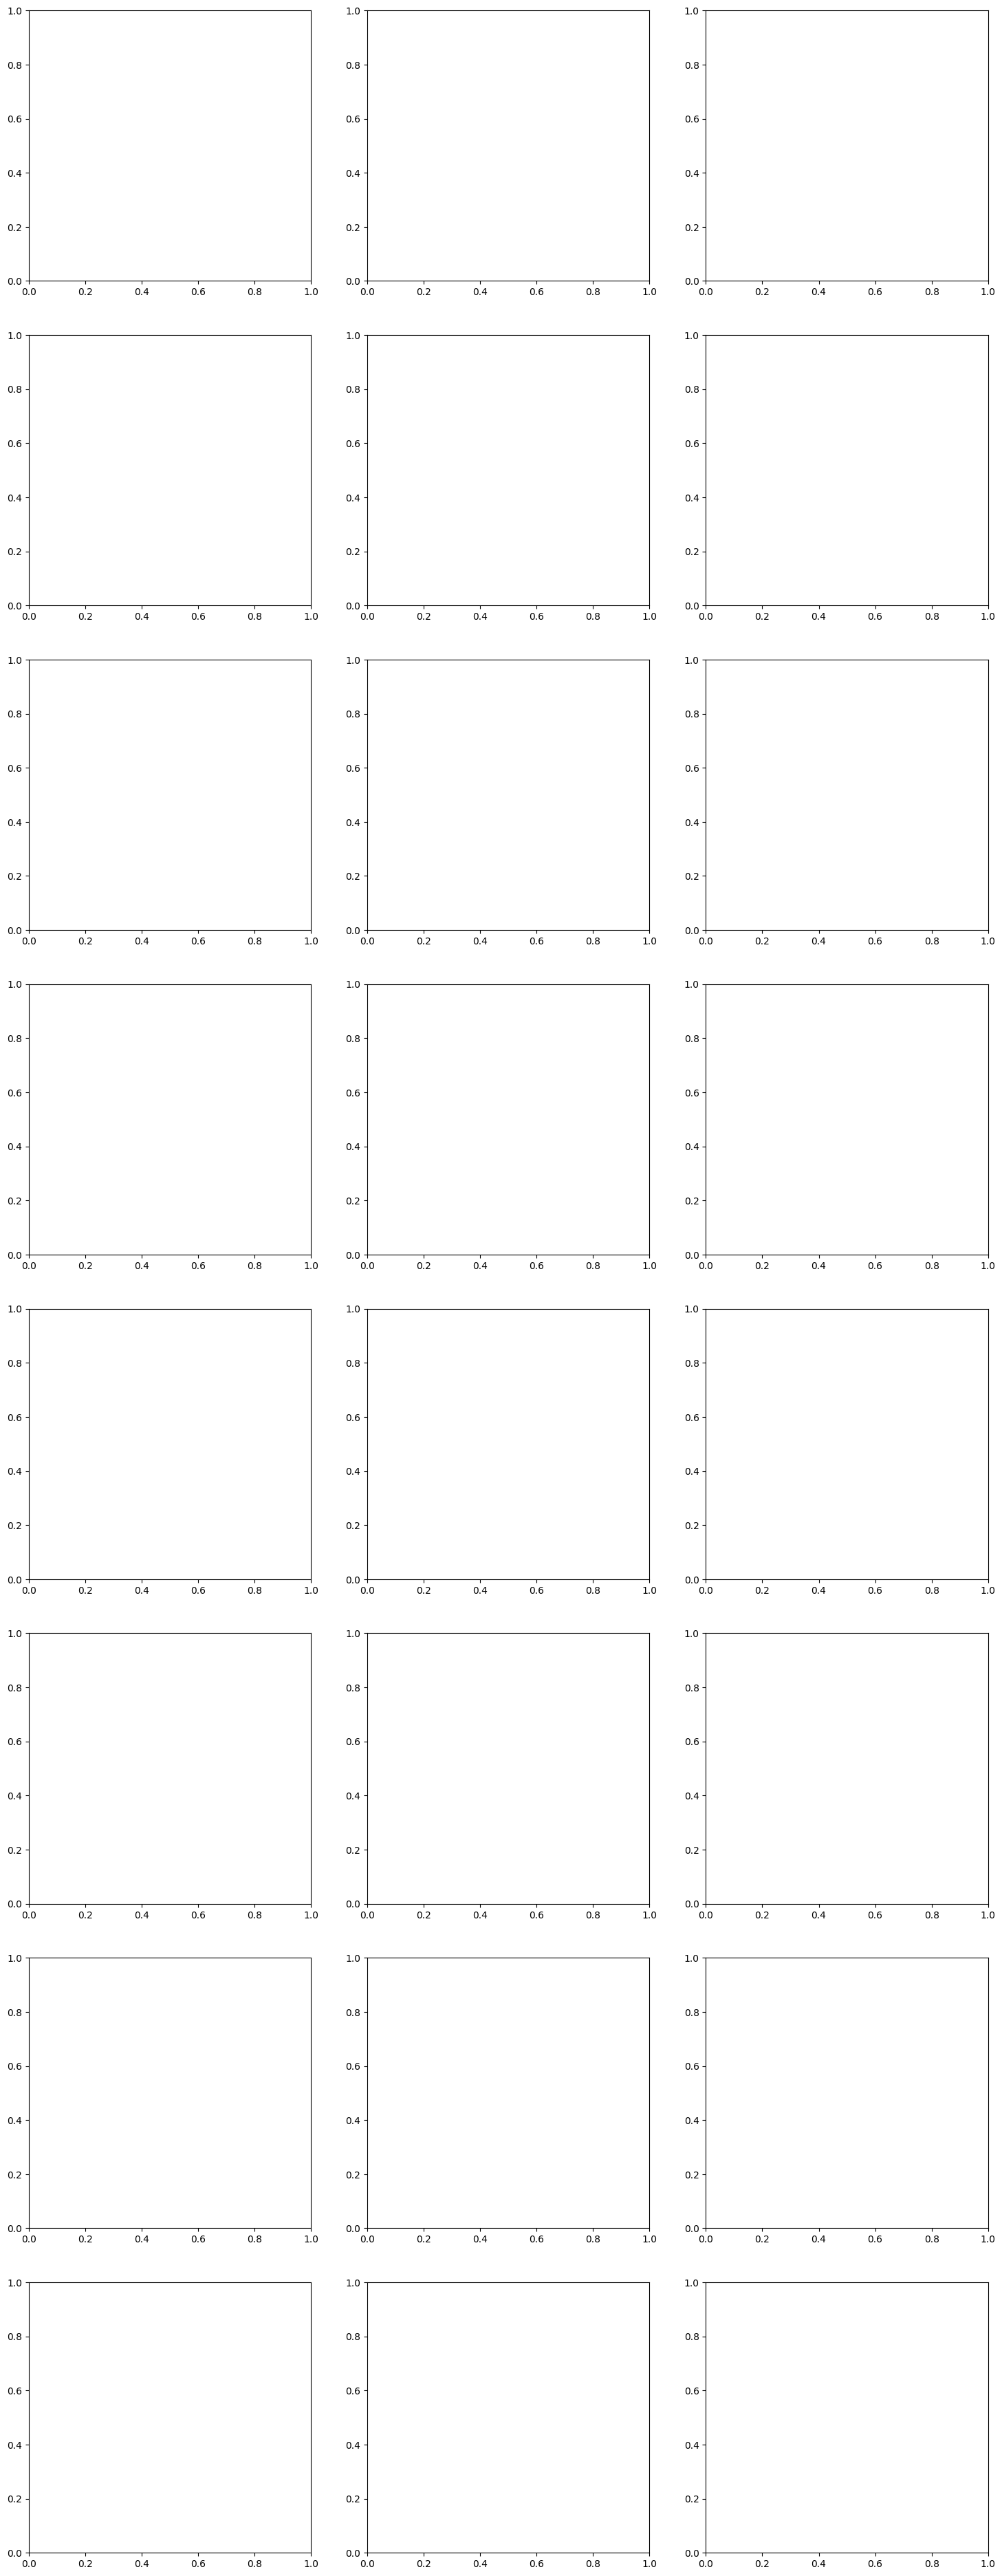

In [49]:
from sklearn.inspection import partial_dependence

numeric_columns = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']

fig, axs = plt.subplots(len(numeric_columns), 3, figsize=(18, 6 * len(numeric_columns)))

for input_variable_index, input_variable_name in enumerate(numeric_columns):
    feature_index = X.columns.get_loc(input_variable_name)

    # Output 1
    pdp1, axes1 = partial_dependence(best_gbr1, X_test, features=[feature_index])
    axs[input_variable_index, 0].plot(axes1[0], pdp1[0])
    axs[input_variable_index, 0].set_title(f"Partial Dependence Plot: Output 1\nInput Variable: {input_variable_name}")

    # Output 2
    pdp2, axes2 = partial_dependence(best_gbr2, X_test, features=[feature_index])
    axs[input_variable_index, 1].plot(axes2[0], pdp2[0])
    axs[input_variable_index, 1].set_title(f"Partial Dependence Plot: Output 2\nInput Variable: {input_variable_name}")

    # Output 3
    pdp3, axes3 = partial_dependence(best_gbr3, X_test, features=[feature_index])
    axs[input_variable_index, 2].plot(axes3[0], pdp3[0])
    axs[input_variable_index, 2].set_title(f"Partial Dependence Plot: Output 3\nInput Variable: {input_variable_name}")

plt.tight_layout()
plt.show()


In [50]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets for each numeric column
input_widgets = {}
for column in numeric_columns:
    input_widgets[column] = widgets.FloatText(description=column, value=0)

# Create output widgets for each output variable
output_widgets = {
    "Output 1": widgets.Label(value="Output 1: Not calculated"),
    "Output 2": widgets.Label(value="Output 2: Not calculated"),
    "Output 3": widgets.Label(value="Output 3: Not calculated"),
}

# Function to make predictions and update output widgets
def on_button_click(button):
    input_values = [input_widgets[column].value for column in numeric_columns]
    input_array = np.array(input_values).reshape(1, -1)

    output1_prediction = best_gbr1.predict(input_array)[0]
    output2_prediction = best_gbr2.predict(input_array)[0]
    output3_prediction = best_gbr3.predict(input_array)[0]

    output_widgets["Output 1"].value = f"Output 1: {output1_prediction:.2f}"
    output_widgets["Output 2"].value = f"Output 2: {output2_prediction:.2f}"
    output_widgets["Output 3"].value = f"Output 3: {output3_prediction:.2f}"

# Create a button to trigger predictions
predict_button = widgets.Button(description="Predict Outputs")
predict_button.on_click(on_button_click)

# Display the GUI
print("Enter input values:")
for column in numeric_columns:
    display(input_widgets[column])

display(predict_button)

print("Predicted outputs:")
for output_label in output_widgets.values():
    display(output_label)


Enter input values:


FloatText(value=0.0, description='C (%)')

FloatText(value=0.0, description='H (%)')

FloatText(value=0.0, description='N (%)')

FloatText(value=0.0, description='O (%)')

FloatText(value=0.0, description='S (%)')

FloatText(value=0.0, description='VM (%)')

FloatText(value=0.0, description='Ash (%)')

FloatText(value=0.0, description='FC (%)')

Button(description='Predict Outputs', style=ButtonStyle())

Predicted outputs:


Label(value='Output 1: Not calculated')

Label(value='Output 2: Not calculated')

Label(value='Output 3: Not calculated')

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


In [69]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets for each numeric column
input_widgets = {}
for column in numeric_columns:
    input_widgets[column] = widgets.FloatText(description=column, value=0)

# Create output widgets for each output variable
output_widgets = {
    "Cellulose yield": widgets.Label(value="Cellulose yield: Not calculated"),
    "Hemicellulose yield": widgets.Label(value="Hemicellulose yield: Not calculated"),
    "Lignin yield": widgets.Label(value="Lignin yield: Not calculated"),
}

# Function to make predictions and update output widgets
def on_button_click(button):
    input_values = [input_widgets[column].value for column in numeric_columns]
    input_array = np.array(input_values).reshape(1, -1)

    cellulose_prediction = best_gbr1.predict(input_array)[0]
    hemicellulose_prediction = best_gbr2.predict(input_array)[0]
    lignin_prediction = best_gbr3.predict(input_array)[0]

    output_widgets["Cellulose yield"].value = f"Cellulose yield: {cellulose_prediction:.2f}"
    output_widgets["Hemicellulose yield"].value = f"Hemicellulose yield: {hemicellulose_prediction:.2f}"
    output_widgets["Lignin yield"].value = f"Lignin yield: {lignin_prediction:.2f}"

# Create a button to trigger predictions
predict_button = widgets.Button(description="Predict Outputs")
predict_button.on_click(on_button_click)

# Display the GUI
print("Enter input values:")
for column in numeric_columns:
    display(input_widgets[column])

display(predict_button)

print("Predicted outputs:")
for output_label in output_widgets.values():
    display(output_label)


Enter input values:


FloatText(value=0.0, description='C (%)')

FloatText(value=0.0, description='H (%)')

FloatText(value=0.0, description='N (%)')

FloatText(value=0.0, description='O (%)')

FloatText(value=0.0, description='S (%)')

FloatText(value=0.0, description='VM (%)')

FloatText(value=0.0, description='Ash (%)')

FloatText(value=0.0, description='FC (%)')

Button(description='Predict Outputs', style=ButtonStyle())

Predicted outputs:


Label(value='Cellulose yield: Not calculated')

Label(value='Hemicellulose yield: Not calculated')

Label(value='Lignin yield: Not calculated')

In [52]:
!pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 10.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=19797a130e9a1a8432db353e7f53ca6bdbaee839adaf0fb1dc11ca0235ff5068
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [54]:
!pip install joblib
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import joblib

joblib.dump(best_gbr1, "best_gbr1.pkl")
joblib.dump(best_gbr2, "best_gbr2.pkl")
joblib.dump(best_gbr3, "best_gbr3.pkl")


['best_gbr3.pkl']

In [56]:
# app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import GradientBoostingRegressor

# Load your trained Gradient Boosting Regressors here
best_gbr1 = joblib.load("best_gbr1.pkl")
best_gbr2 = joblib.load("best_gbr2.pkl")
best_gbr3 = joblib.load("best_gbr3.pkl")

numeric_columns = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']

st.title("Cellulose, Hemicellulose, and Lignin Yield Prediction")
st.subheader("Enter input values:")

# Create input widgets for each numeric column
input_values = {}
for column in numeric_columns:
    input_values[column] = st.number_input(column, value=0.0)

# Predict outputs
def predict_outputs(input_values):
    input_array = np.array([input_values[column] for column in numeric_columns]).reshape(1, -1)

    cellulose_prediction = best_gbr1.predict(input_array)[0]
    hemicellulose_prediction = best_gbr2.predict(input_array)[0]
    lignin_prediction = best_gbr3.predict(input_array)[0]

    return cellulose_prediction, hemicellulose_prediction, lignin_prediction

if st.button("Predict Outputs"):
    cellulose_yield, hemicellulose_yield, lignin_yield = predict_outputs(input_values)
    st.write(f"Cellulose yield: {cellulose_yield:.2f}")
    st.write(f"Hemicellulose yield: {hemicellulose_yield:.2f}")
    st.write(f"Lignin yield: {lignin_yield:.2f}")


  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-01 07:05:57.407 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [58]:
!pip install streamlit numpy pandas scikit-learn joblib
!pip freeze > requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!echo "web: streamlit run app.py --server.port $PORT" > Procfile



In [63]:

import os

print(os.getcwd())

/content


In [64]:
cd /content


/content


In [67]:
!git init
!git add .
!git commit -m "Initial commit"




Initialized empty Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@1be5f98395c7.(none)')


In [68]:
!git add .
!git commit -m "Update files"



*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@1be5f98395c7.(none)')


In [71]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  19555      0 --:--:-- --:--:-- --:--:-- 19555
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Hit:10 http://ppa.la

In [73]:
!heroku login


 ›   Warning: heroku update available from 7.69.1 to 8.0.2.
heroku: Press any key to open up the browser to login or q to exit: 
Opening browser to https://cli-auth.heroku.com/auth/cli/browser/153c4d65-cbc9-4568-9d3e-6d4749bb958f?requestor=SFMyNTY.g2gDbQAAAA0zNS4yMjEuNDUuMjAybgYAYIW_O4cBYgABUYA.X6yUAzhheNeIR5yzAn5P8MSR08ZRd3D4bBRPHrJdfmo
heroku: Waiting for login...
 ›   Warning: Cannot open browser.
heroku: Waiting for login... ⣾
heroku: Waiting for login... ⣽
heroku: Waiting for login... ⣻
heroku: Waiting for login... ⢿
heroku: Waiting for login... ⡿
heroku: Waiting for login... ⣟
heroku: Waiting for login... ⣯
heroku: Waiting for login... ⣷
heroku: Waiting for login... ⣾
heroku: Waiting for login... ⣽
heroku: Waiting for login... ⣻
heroku: Waiting for login... ⢿
heroku: Waiting for login... ⡿
heroku: Waiting for login... ⣟
heroku: Waiting for login... ⣯
heroku: Waiting for login... ⣷
heroku: Waiting for login... ⣾
heroku: Waiting for login... ⣽
heroku: Waiting for login... ⣻
heroku:

# New Section